In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electron_flux_data = np.loadtxt('../../AllSimData/Neutrinos/ElectronNeutrinoFluxForGenie.dat', delimiter = ',')
muon_flux_data = np.loadtxt('../../AllSimData/Neutrinos/MuonNeutrinoFluxForGenie.dat', delimiter = ',')

In [3]:
Ee, bin_val_e = electron_flux_data.T
Emu, bin_val_mu = muon_flux_data.T

#Rescale such that sum of bins isn't 1
#bin_val_e *= 1.94969
#bin_val_mu *= 4.07026

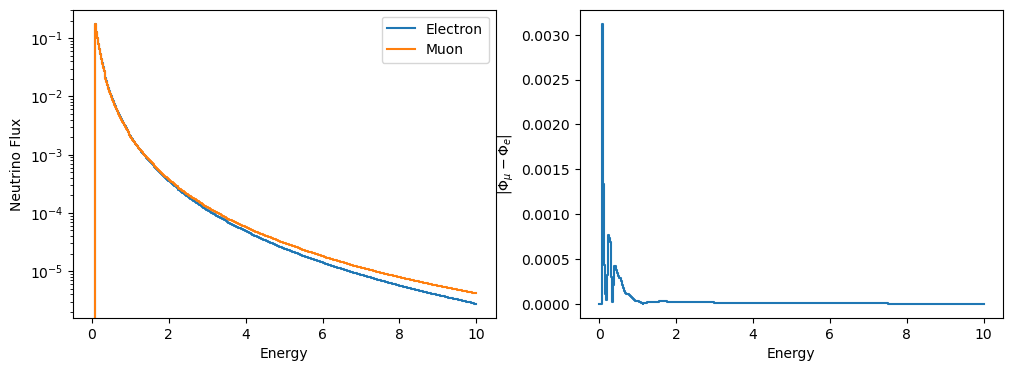

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax[0].step(Ee,bin_val_e, label = 'Electron')
ax[0].step(Emu, bin_val_mu, label = 'Muon')
ax[0].set_yscale('log')
ax[0].set_ylabel('Neutrino Flux')
ax[0].set_xlabel('Energy')

ax[1].step(Emu, np.abs(bin_val_mu - bin_val_e))
#ax[1].set_yscale('log')
ax[1].set_ylabel(r'$|\Phi_{\mu} - \Phi_e|$')
ax[1].set_xlabel('Energy')

ax[0].legend()

Text(0.5, 0, 'Energy')

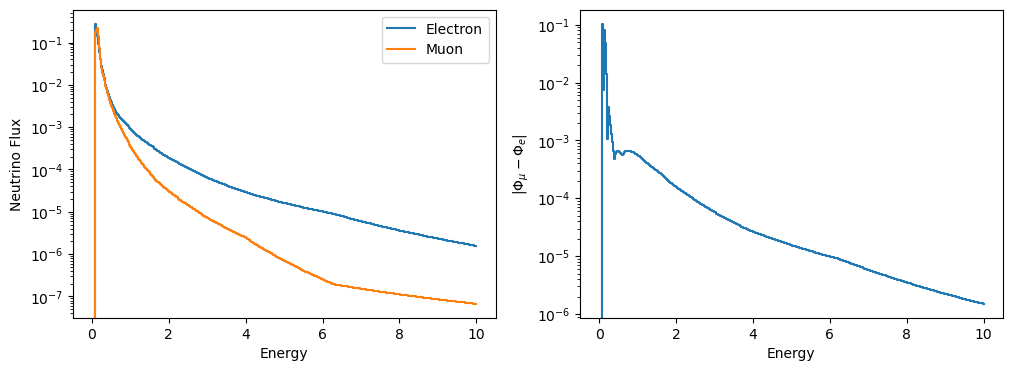

In [5]:
electron_flux_data = np.loadtxt('../../AllSimData/Neutrinos/LHCElectronFlux.csv', delimiter = ',')
muon_flux_data = np.loadtxt('../../AllSimData/Neutrinos/LHCMuonFlux.csv', delimiter = ',')

Ee, bin_val_e = electron_flux_data.T
Emu, bin_val_mu = muon_flux_data.T

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax[0].step(Ee,bin_val_e, label = 'Electron')
ax[0].step(Emu, bin_val_mu, label = 'Muon')
ax[0].set_yscale('log')
ax[0].set_ylabel('Neutrino Flux')
ax[0].set_xlabel('Energy')
ax[0].legend()

ax[1].step(Emu, np.abs(bin_val_mu - bin_val_e))
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$|\Phi_{\mu} - \Phi_e|$')
ax[1].set_xlabel('Energy')

In [66]:
import pickle

In [67]:
with open('../../AllSimData/nue_0-1Gev_100kev_gntp.0.gst.pickle', 'rb') as f:
    inputev = pickle.load(f)
    sigmaeff = pickle.load(f)
    weights = pickle.load(f)
    pdgs = pickle.load(f)
    pdgfreq = pickle.load(f)

In [8]:
inputev

100000

In [9]:
sigmaeff

8.42080598672

In [10]:
len(pdgs)

12

In [11]:
len(pdgfreq)

12

In [12]:
pdgs

[-14, -13, -11, 11, 12, 13, 14, 22, 2112, 2212, 1000070140, 1000080160]

In [8]:
with open('test.pickle','rb') as f:
    data = pickle.load(f)

In [9]:
data['weights']

array([0.00477819, 0.01109697, 0.044105  , ..., 0.03714184, 0.0179995 ,
       0.00379026])

In [14]:
len(data['weights'])

100000

In [20]:
l = np.arange(0, len(data['weights']) / 4, 0.25)

In [21]:
len(l)

100000

In [23]:
np.floor(0.3 * 4) 

1.0

In [24]:
from scipy.interpolate import interp1d

In [15]:
data.keys()

dict_keys(['inputev', 'sigmaeff', 'weights', 'pdgs'])

In [20]:
data['pdgs'][1].sum() / inputev

4.19797

In [22]:
data['weights'].sum()

955.8872260231357

In [2]:
import uproot

In [56]:
file = uproot.open('../../AllSimData/nue_0-1Gev_100kev_gntp.0.gst.root:gst')

In [59]:
data = file.arrays(library = 'np')

In [60]:
data.keys()

dict_keys(['iev', 'neu', 'fspl', 'tgt', 'Z', 'A', 'hitnuc', 'hitqrk', 'resid', 'sea', 'qel', 'mec', 'res', 'dis', 'coh', 'dfr', 'imd', 'imdanh', 'singlek', 'nuel', 'em', 'cc', 'nc', 'charm', 'neut_code', 'nuance_code', 'wght', 'xsec', 'diffxsec', 'xs', 'ys', 'ts', 'Q2s', 'Ws', 'x', 'y', 't', 'Q2', 'W', 'EvRF', 'Ev', 'pxv', 'pyv', 'pzv', 'En', 'pxn', 'pyn', 'pzn', 'chargel', 'El', 'pxl', 'pyl', 'pzl', 'pl', 'cthl', 'nfp', 'nfn', 'nfpip', 'nfpim', 'nfpi0', 'nfkp', 'nfkm', 'nfk0', 'nfem', 'nfother', 'nip', 'nin', 'nipip', 'nipim', 'nipi0', 'nikp', 'nikm', 'nik0', 'niem', 'niother', 'ni', 'pdgi', 'resc', 'Ei', 'pxi', 'pyi', 'pzi', 'nf', 'pdgf', 'chargef', 'Ef', 'pxf', 'pyf', 'pzf', 'pf', 'cthf', 'vtxx', 'vtxy', 'vtxz', 'vtxt', 'sumKEf', 'calresp0'])

In [14]:
data['pxi'][0]

array([-0.04513965])

In [17]:
data['pxn'][0]

-0.04785392975056937

In [317]:
np.max(data['calresp0'])

1.3123890120881958

In [303]:
data['ni']

array([1, 1, 1, ..., 1, 2, 1])

In [304]:
data['nf']

array([ 2,  2,  7, ...,  3, 12,  3])

In [194]:
data['pdgi']

array([array([2212]), array([2212]), array([2212]), ..., array([2212]),
       array([2212,   22]), array([2212])], dtype=object)

In [245]:
np.unique(data['Ws'][data['Ws'] > -20000])

array([0.13957018, 0.93827   , 0.93957   , ..., 1.64434695, 1.66922434,
       1.67667213])

In [160]:
(data['coh'] == False).sum()

99090

In [255]:
np.unique(data['Ws'][data['Ws'] > -2000])

array([0.13957018, 0.93827   , 0.93957   , ..., 1.64434695, 1.66922434,
       1.67667213])

In [252]:
np.unique(data['W'])

array([-1.        ,  0.27881597,  0.39317931, ...,  1.63384823,
        1.64187503,  1.64746232])

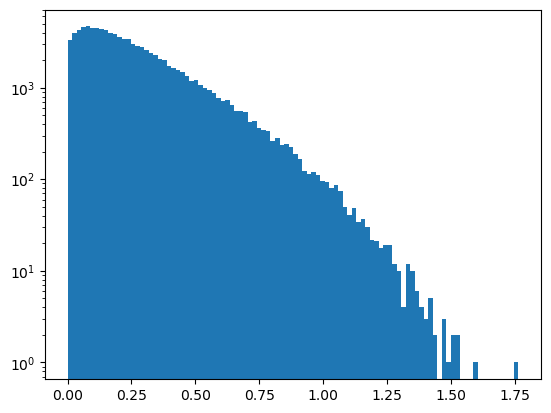

In [269]:
plt.hist(data['Q2s'][data['Q2s'] > -2000], bins = 100)
plt.yscale('log')

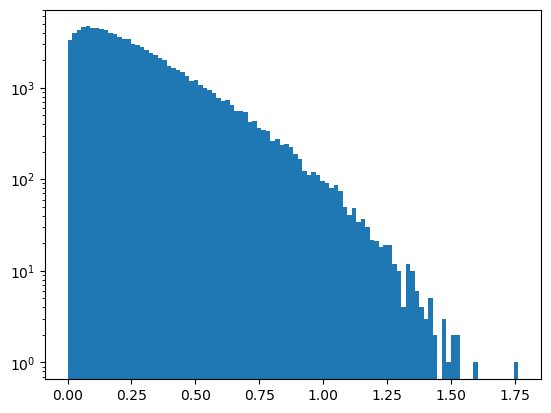

In [270]:
plt.hist(data['Q2'], bins = 100)
plt.yscale('log')

In [61]:
def root_load(energy:str):
    file = uproot.open(f'../../AllSimData/nue_{energy}Gev_100kev_gntp.0.gst.root:gst')
    return file.arrays(library = 'np')

In [64]:
data = root_load('1-2')
for key in ['vtxx', 'vtxy', 'vtxz']:
    print(np.unique(data[key]))

[0.]
[0.]
[0.]


In [65]:
data = root_load('2-10')
for key in ['vtxx', 'vtxy', 'vtxz']:
    print(np.unique(data[key]))

[0.]
[0.]
[0.]
